# Linear Regression Hardcoded

In this notebook, we are going to hardcode the linear regression algorithm (no use of libraries like scikit-learn and such)

## imports + configurations

In here, we are going to import our dependencies

In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import sqrt

In here, we import our data.<br>
The dataset represents the changes in temperature during the world war 2.<br>
I got the data from kaggle: __[Weather World War 2](https://www.kaggle.com/smid80/weatherww2)__

In [47]:

data = pd.read_csv("datasets/weather_ww2/Summary of Weather.csv", delimiter=',', low_memory=False)
data.fillna(0,inplace=True)
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,0.0,25.555556,22.222222,23.888889,0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,10001,1942-7-2,0,0.0,28.888889,21.666667,25.555556,0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,10001,1942-7-3,2.54,0.0,26.111111,22.222222,24.444444,0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,10001,1942-7-4,2.54,0.0,26.666667,22.222222,24.444444,0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,10001,1942-7-5,0,0.0,26.666667,21.666667,24.444444,0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [48]:
data.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,...,119040.0,119040.0,119040.0,119040.0,119040.000000,119040.0,119040.0,119040.0,119040.0,119040.0
mean,29659.435795,0.168818,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,0.120884,0.091154,...,0.0,0.0,0.0,0.0,0.053300,0.0,0.0,0.0,0.0,0.0
std,20953.209402,2.611819,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,2.069915,1.410269,...,0.0,0.0,0.0,0.0,0.886512,0.0,0.0,0.0,0.0,0.0
min,10001.000000,0.000000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11801.000000,0.000000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
50%,22508.000000,0.000000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
75%,33501.000000,0.000000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,0.0,0.0,0.0,0.0,23.900000,0.0,0.0,0.0,0.0,0.0


## Representing the data
Now we select the rows we are going to use.

In [49]:
columns = ['MaxTemp','MinTemp']
filteredColumns = data[columns]
filteredColumns.describe()

,MaxTemp,MinTemp
count,119040.000000,119040.000000
mean,27.045111,17.789511
std,8.717817,8.334572
min,-33.333333,-38.333333
25%,25.555556,15.000000
50%,29.444444,21.111111
75%,31.666667,23.333333
max,50.000000,34.444444


We print a plot graph representing the data.

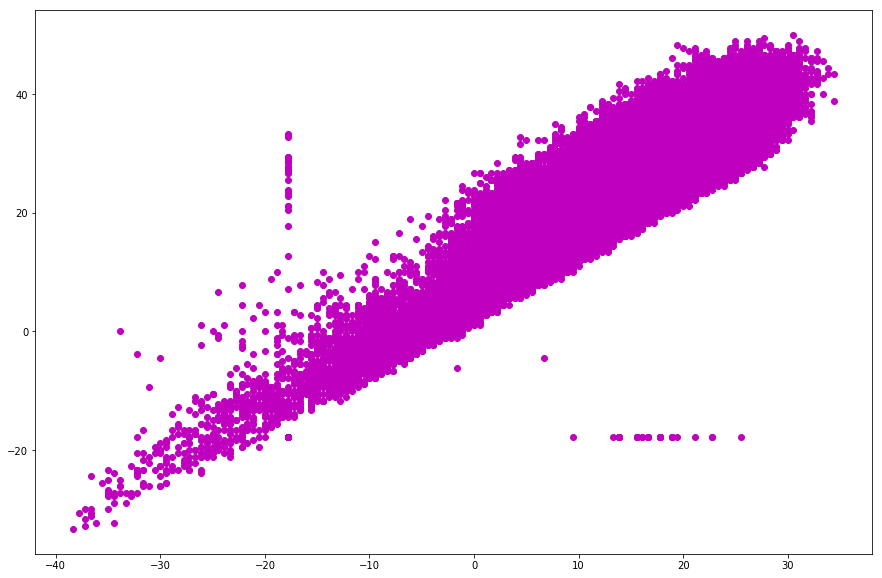

In [50]:
plt.figure(figsize=(15,10))
x = filteredColumns['MinTemp']
y = filteredColumns['MaxTemp']
plt.plot(x,y,'mo')

And we print a nice graph representing the Minimum temperature / Mean(Maximum temperature).

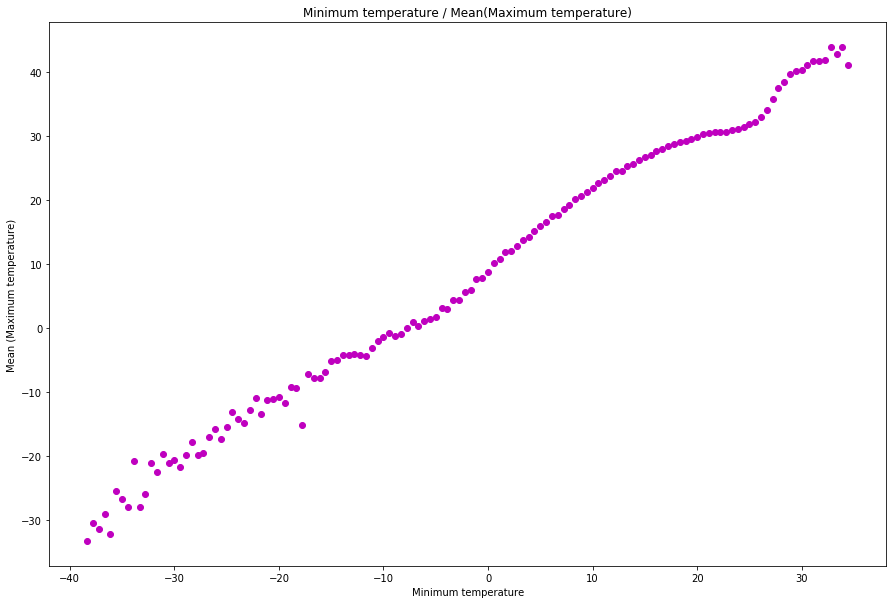

In [51]:
#group the data by MinTemp (x axis)
#calculate the mean of the MaxTemp (y axis)
#reset the dataframe with the column names as indexes
dataWithYAsMean = filteredColumns.groupby('MinTemp').mean().reset_index()

x_grouped = dataWithYAsMean['MinTemp']
y_grouped = dataWithYAsMean['MaxTemp']

plt.figure(figsize=(15,10))

plt.title('Minimum temperature / Mean(Maximum temperature)')
plt.xlabel('Minimum temperature')
plt.ylabel('Mean (Maximum temperature)')
plt.plot(x_grouped,y_grouped,'mo')

## Simple linear regression algorithm
We first declare our Error function. We are going to use the __[Root Mean Squared Error(RMSE)](http://www.statisticshowto.com/rmse/)__ to evaluate our prediction.<br>
The Root Mean Squared Error equation is:<br>
$$
\begin{align*}
RMSE &= \sqrt{\frac{1}{n}\sum_{i=1}^n(Y_i - \bar{Y})^2}
\end{align*}
$$

In [52]:
# Calculate the mean of a list of numbers
def calculate_mean(values):
    return sum(values)/float(len(values))

# Calculate root mean squared error
def root_mean_squared_error(actual_values, predicted_values):
    sum_value = .0
    for i in range(len(actual_values)):
        sum_value += ((predicted_values[i] - actual_values[i]) ** 2)
        
    return sqrt(sum_value/float(len(actual_values)))
    

We then define our simple linear regression function. To get our line, we need to minimize our loss function. <br>
You can find out more about it in this nice __[document](https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf)__. <br>
To resume, the optimal b1 and b0 values can be found using those equations: <br><br>
$$
\begin{align*}
\hat{\beta}_1 &= \frac{\sum_{i=1}^n(X_i - \bar{X})(Y_i-\bar{Y})}{\sum_{i=1}^n(X_i - \bar{X})^2} \\
\hat{\beta}_0 &= \bar{Y} - \hat{\beta}_1 \bar{X} \\
\end{align*}
$$
We can write b1 with covarience and variance formulas:
$$
\DeclareMathOperator{\Var}{Var}
\DeclareMathOperator{\Cov}{Cov}
\begin{align*}
\hat{\beta}_1 &= \frac{\Cov(X,Y)}{\Var(X)}
\end{align*}
$$
Note that Covariance and Varience formulas are:
$$
\begin{align*}
\Cov(X,Y) &= \frac{1}{n}\sum_{i=1}^n(X_i - \bar{X})(Y_i-\bar{Y}) \\
\Var(X) &= \frac{1}{n}\sum_{i=1}^n(X_i - \bar{X})^2
\end{align*}
$$

In [53]:
# Covariance function
def covariance(x,y):
    # calculate the mean of x and y
    mean_x = calculate_mean(x)
    mean_y = calculate_mean(y)
    
    # calculate covariance
    cov = .0
    for i in range(len(x)):
        cov += (x[i] - mean_x) * (y[i] - mean_y)
        
    return cov / float(len(x))

# Variance function
def variance(x):
    # calculate the mean of x
    mean_x = calculate_mean(x)
    
    # calculate variance
    var = .0
    for x_i in x:
        var += ((x_i - mean_x) ** 2)
        
    return var / float(len(x))
    
# Simple linear regression algorithm
# For our example, we are going to try to find the equation of our line
# y = b0 + b1*x
def simple_linear_regression(x, y):
    # calculate the mean of x and y
    mean_x = calculate_mean(x)
    mean_y = calculate_mean(y)
    
    # calculate the regression coefficients
    b1 = covariance(x,y) / variance(x)
    b0 = mean_y - (b1 * mean_x)
    
    # predicted vector
    predicted_y = b0 + (b1 * x)
    
    return predicted_y
    
# linear regression plot function
def plot_linear_regression_result(x,y,predicted_y):
    # plotting the actual points as a scatter
    plt.figure(figsize=(15,10))
    plt.scatter(x,y,color = "y", marker = "o",s=30)
    
    # plotting the regression line
    plt.plot(x, predicted_y, color = "m")
 
    # putting labels
    plt.title('Linear regression of Min/Max Temperature during World War 2')
    plt.xlabel('Min Temperature')
    plt.ylabel('Max Temperature')
 
    # function to show plot
    plt.show()

Plotting a nice representation of our simple linear regression result

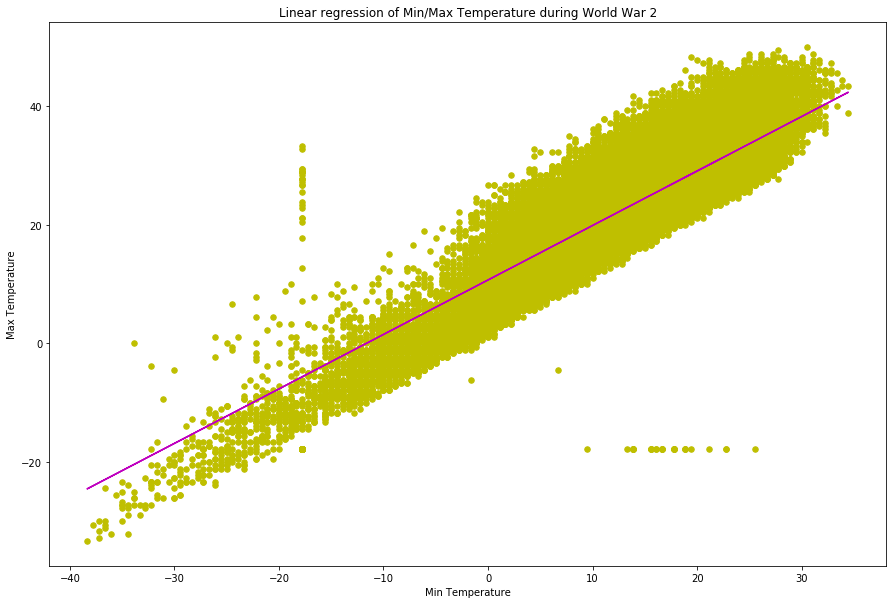

In [54]:
# getting the predicted y values
predicted_y = simple_linear_regression(x,y)

# calling the plot function
plot_linear_regression_result(x,y,predicted_y)

And finally, we print our loss.

In [55]:
rmse = root_mean_squared_error(y,predicted_y)
print("Root Mean Squared Error value = {}".format(rmse))

Root Mean Squared Error value = 4.1667132282629975
